# 데이터분석 실무3
- CCTV 설치 데이터 분석

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
# 한글 찍기
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    rc('font', family = 'Malgun Gothic')   # 또는 '맑은 고딕'
else:
    print('Unknown system... sorry~~~~')

## 실습 1. CCTV_in_Seoul.csv 파일을 pandas 로 읽어오세요.
 

In [3]:
CCTV_Seoul = pd.read_csv('./datas/CCTV_in_Seoul.csv')

In [4]:
CCTV_Seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 실습 2. 컬럼 중 "기관명" 컬럼명을 "구별" 로 이름을 바꾸세요.

In [5]:
CCTV_Seoul.rename(columns= {'기관명':'구별'} , inplace= True )

In [6]:
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


## 실습 3. population_in_Seoul.xls 파일을 읽으세요. 

In [7]:
pd.read_excel('./datas/population_in_Seoul.xls')

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764
5,2017.1/4,용산구,106544,244203,119132,125071,229456,111167,118289,14747,7965,6782,2.15,36231
6,2017.1/4,성동구,130868,311244,153768,157476,303380,150076,153304,7864,3692,4172,2.32,39997
7,2017.1/4,광진구,158960,372164,180992,191172,357211,174599,182612,14953,6393,8560,2.25,42214
8,2017.1/4,동대문구,159839,369496,182932,186564,354079,177021,177058,15417,5911,9506,2.22,54173
9,2017.1/4,중랑구,177548,414503,206102,208401,409882,204265,205617,4621,1837,2784,2.31,56774


In [8]:
# pip install xlrd

In [9]:
pd.read_excel('./datas/population_in_Seoul.xls')

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764
5,2017.1/4,용산구,106544,244203,119132,125071,229456,111167,118289,14747,7965,6782,2.15,36231
6,2017.1/4,성동구,130868,311244,153768,157476,303380,150076,153304,7864,3692,4172,2.32,39997
7,2017.1/4,광진구,158960,372164,180992,191172,357211,174599,182612,14953,6393,8560,2.25,42214
8,2017.1/4,동대문구,159839,369496,182932,186564,354079,177021,177058,15417,5911,9506,2.22,54173
9,2017.1/4,중랑구,177548,414503,206102,208401,409882,204265,205617,4621,1837,2784,2.31,56774


## 실습 4.population_in_Seoul.xls 파일을 읽으세요.
### header 는 3번째 row 로 사용할 것입니다. 따라서 header = 2  로 셋팅하세요.
### 엑셀파일의 컬럼은  B, D, G, J, N 만 사용할 것입니다.

In [10]:
pop_Seoul = pd.read_excel('./datas/population_in_Seoul.xls',
                         header=2,
                         usecols='B, D, G, J, N')

In [11]:
pop_Seoul.head(3)

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


## 실습 5-1. pop_Seoul 의 컬럼명을 모두 출력하세요.

In [12]:
pop_Seoul.columns

Index(['자치구', '계', '계.1', '계.2', '65세이상고령자'], dtype='object')

## 실습 5-2. 컬럼명을 다음처럼 바꿉니다.
### 0번째는 '구별' , 1번째는 '인구수', 2번쨰는 '한국인', 3번째는 '외국인', 4번째는 '고령자'  로 rename

In [13]:
pop_Seoul.columns = [ '구별', '인구수', '한국인', '외국인', '고령자' ]

In [14]:
pop_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


## 실습 6. CCTV 갯수가 가장 많은 순부터 적은 순으로 정렬한 후, 상위 20개만 화면에 보여주세요.


In [15]:
CCTV_Seoul.sort_values('소계', ascending=False).head(20)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398
6,구로구,1561,1142,173,246,323
4,관악구,1496,846,260,390,613
16,성북구,1464,1009,78,360,204
10,동대문구,1294,1070,23,198,579
8,노원구,1265,542,57,451,516


## 실습 7. 최근 3년간 CCTV 증가율을 계산하여, dataframe 에 '최근증가율' 컬럼을 추가하세요.
### 증가율 계산  :  (2016 + 2015 + 2014) / 2013이전 * 100

In [16]:
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204


In [17]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + CCTV_Seoul['2014년'] ) / CCTV_Seoul['2013년도 이전'] * 100

In [18]:
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252


## 실습 8. 최근 3년간 CCTV 증가율이 가장 높은 순으로 5개의 구를 찾으세요.

In [19]:
CCTV_Seoul.head(2)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765


In [20]:
CCTV_Seoul.sort_values('최근증가율', ascending=False)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765
19,영등포구,904,495,214,195,373,157.979798
0,강남구,2780,1292,430,584,932,150.619195
4,관악구,1496,846,260,390,613,149.290780
23,중구,671,413,190,72,348,147.699758
11,동작구,1091,544,341,103,314,139.338235


In [21]:
pop_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0


In [22]:
pop_Seoul.drop(0)

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [23]:
# 가져오기
pop_Seoul.loc[ 1: , :]

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [24]:
pop_Seoul = pop_Seoul.drop(0)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


## 실습 9. 서울시의 인구 데이터 중, 가장 첫번째 행은 필요 없으니, 삭제하세요.

In [25]:
pop_Seoul.isna().sum()

구별     1
인구수    1
한국인    1
외국인    1
고령자    1
dtype: int64

In [26]:
pop_Seoul.dropna()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


## 실습 9. 서울시의 인구 데이터 중, NaN이 있는지 확인하고, NaN이 있으면 해당 row를 삭제하세요.

In [27]:
pop_Seoul = pop_Seoul.dropna()
pop_Seoul

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


## 실습 10. '외국인비율' 과 '고령자비율' 두개의 컬럼을 추가하세요.
- 외국인비율 = 외국인 수 / 인구수 * 100
- 고령자비율 = 고령자 수 / 인구수 * 100

In [28]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [29]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인']/pop_Seoul['인구수']*100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852


In [30]:
pop_Seoul['고령자비율'] = pop_Seoul['고령자']/pop_Seoul['인구수']*100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


## 실습 11. 외국인 대상으로 장사를 하려 합니다. 외국인이 가장 많은 구와, 외국인비율이 가장 높은 구를 각각 5개씩 찾으세요.

In [31]:
pop_Seoul.sort_values('외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [32]:
pop_Seoul.sort_values('외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


## 실습 12. 고령자 대상 마케팅을 구상 중입니다. 고령자가 가장 많은 구와, 고령자비율이 가장 높은 구를 각각 5개씩 찾으세요.

In [33]:
pop_Seoul.sort_values('고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


In [34]:
# 실제 고령자 수
pop_Seoul.sort_values('고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 실습 13. CCTV 데이터와 인구 데이터 합치고 분석하기  

data_result 라는 변수로 저장합니다.

In [35]:
CCTV_Seoul.head(3)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252


In [36]:
pop_Seoul.head(3)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


- cctv 수와 인구랑, 외국인이랑, 고령자랑 상관관계가 있는지 확인해보기 위함

In [37]:
# 구별 이름으로 merge하기
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [38]:
# 소계 -> CCTV갯수
data_result = data_result.rename(columns={'소계':'CCTV갯수'})
data_result.head()

,구별,CCTV갯수,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 실습 13-2 전처리한 data_result 데이터 프레임을 csv 파일로 저장하세요.

In [ ]:
# 파일 저장위치와 파일명
data_path = "cleaning_data/cctv_cleaning1.csv"

import os
os.makedirs('cleaning_data', exist_ok=True)
data_result.to_csv(data_path)

## 실습 14. data_result 에서, 다음 4개의 컬럼을 모두 버려 버립니다.
### '2013년도 이전', 2014년', '2015년', '2016년' 

In [39]:
data_result.head(3)

,구별,CCTV갯수,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342


In [40]:
# ['2013년도 이전', '2014년', '2015년', '2016년'] 삭제
data_result = data_result.drop(['2013년도 이전', '2014년', '2015년', '2016년'], axis=1)

In [41]:
data_result.loc[data_result['구별']=='강서구', ]

,구별,CCTV갯수,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.08054,12.015794


In [42]:
data_result.head()

,구별,CCTV갯수,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 실습 15-1. dara_result 의 인덱스를, '구별' 로 바꿔 줍니다.

In [43]:
data_result = data_result.set_index('구별')
data_result.head()

,CCTV갯수,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [44]:
data_result.loc['강서구', ]

CCTV갯수       884.000000
최근증가율        134.793814
인구수       603772.000000
한국인       597248.000000
외국인         6524.000000
고령자        72548.000000
외국인비율          1.080540
고령자비율         12.015794
Name: 강서구, dtype: float64

## 실습 15-2. 이 데이터프레임을 csv 파일로 저장합니다.
### 파일명은, CCTV_result.csv 입니다.

In [45]:
data_path = "cleaning_data/CCTV_result.csv"
data_result.to_csv(data_path)

In [46]:
data_result2 = pd.read_csv(data_path, index_col=0)
data_result2.head()

,CCTV갯수,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


## 실습 16. 상관 관계 분석에 대해서 알아봅니다.
### https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D

상관계수는 -1부터 1까지의 값을 갖는다.

1일 때 완벽한 양의 상관관계가 되고, 

-1일 때 완벽한 음의 상관관계가 된다. 

0이라면 별다른 상관관계가 없음을 의미한다.


-  인공지능을 만들때 관련이 있는 데이터를 추출하기 위함. -> 정확도가 중요함.

## 실습 17. CCTV의 갯수와 고령자 비율의 상관관계를 분석하세요.

In [47]:
data_result.head()

,CCTV갯수,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [49]:
data_result[['CCTV갯수', '고령자비율']].corr()

,CCTV갯수,고령자비율
CCTV갯수,1.000000,-0.280786
고령자비율,-0.280786,1.000000


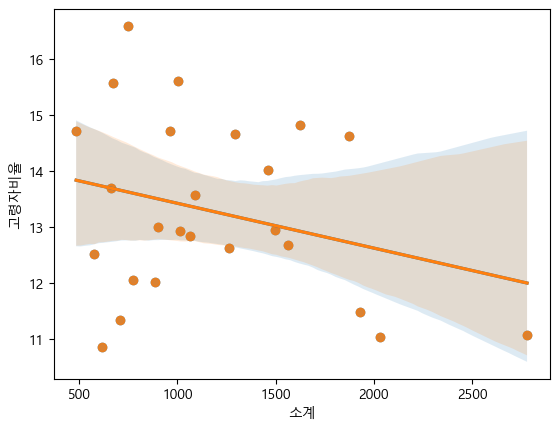

In [ ]:
import seaborn as sb
sb.regplot(data=data_result, x = '소계', y='고령자비율')
plt.show()

## 실습 18. CCTV의 갯수와 외국인 비율의 상관관계를 분석하세요.

In [50]:
data_result[['CCTV갯수', '외국인비율']].corr()

,CCTV갯수,외국인비율
CCTV갯수,1.000000,-0.136074
외국인비율,-0.136074,1.000000


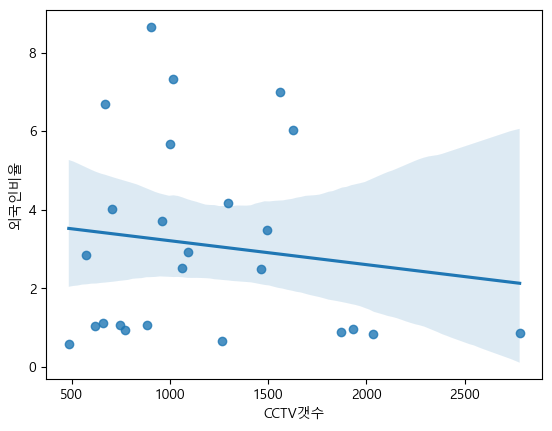

In [51]:
import seaborn as sb
sb.regplot(data=data_result, x = 'CCTV갯수', y='외국인비율')
plt.show()

## 실습 19. CCTV의 갯수와 인구수의 상관관계를 분석하세요.

In [52]:
data_result[['CCTV갯수', '인구수']].corr()

,CCTV갯수,인구수
CCTV갯수,1.000000,0.306342
인구수,0.306342,1.000000


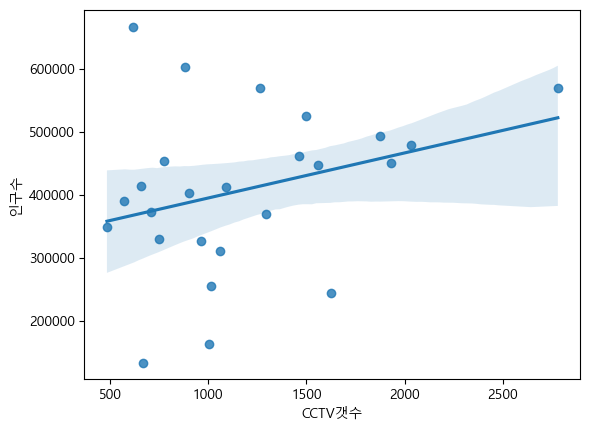

In [53]:
sb.regplot(data=data_result, x = 'CCTV갯수', y='인구수')
plt.show()

## 실습 20. 각 구의 CCTV의 갯수를 bar로 나타내세요.
### pandas dataframe.plot 함수 사용

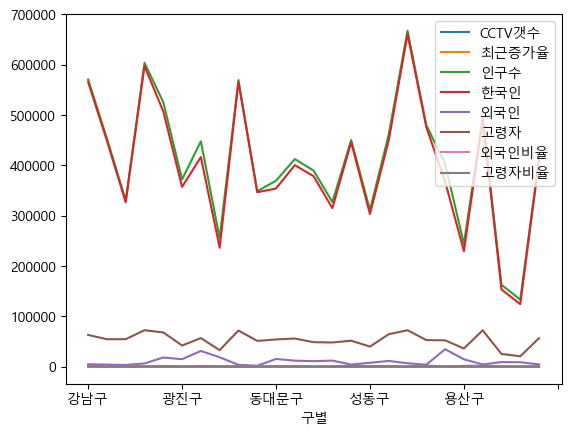

In [54]:
# x 축은 인덱스, y축은 데이터로 표시하는 함수
data_result.plot()
plt.show()

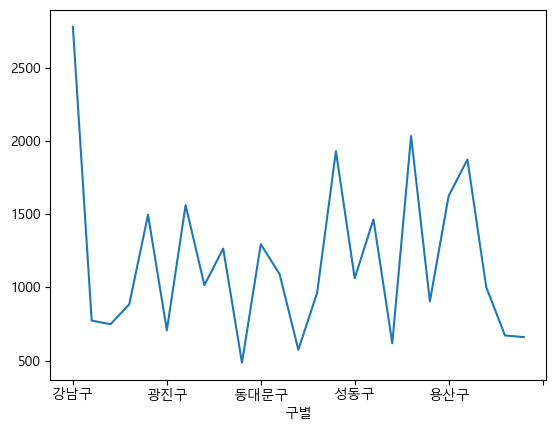

In [55]:
data_result['CCTV갯수'].plot()
plt.show()

## 실습 21. 각 구의 CCTV의 갯수를, 먼저 소팅(큰순)한 후,  bar로 나타내세요.

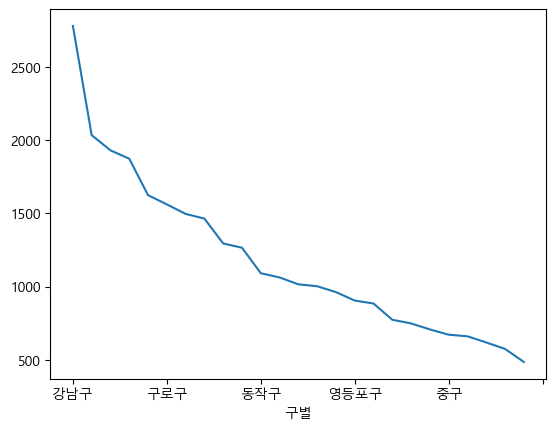

In [56]:
data_result['CCTV갯수'].sort_values(ascending=False).plot()
plt.show()

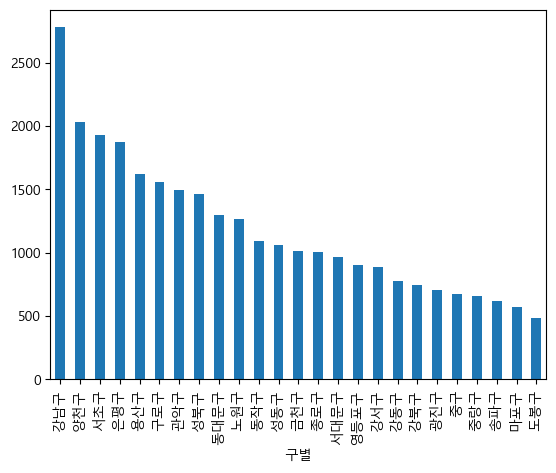

In [57]:
data_result['CCTV갯수'].sort_values(ascending=False).plot(kind='bar')
plt.show()

## 실습 22. 인구 한명당 CCTV의 비율을 계산하고, 이를 각 구별로 CCTV비율이 얼마인지 bar로 나타내세요.

In [58]:
data_result.head()

,CCTV갯수,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [59]:
data_result['인구1인당CCTV비율'] = data_result['CCTV갯수']/data_result['인구수'] * 100
data_result.head()

,CCTV갯수,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,인구1인당CCTV비율
구별,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638,0.170552
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342,0.226535
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794,0.146413
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291,0.284673


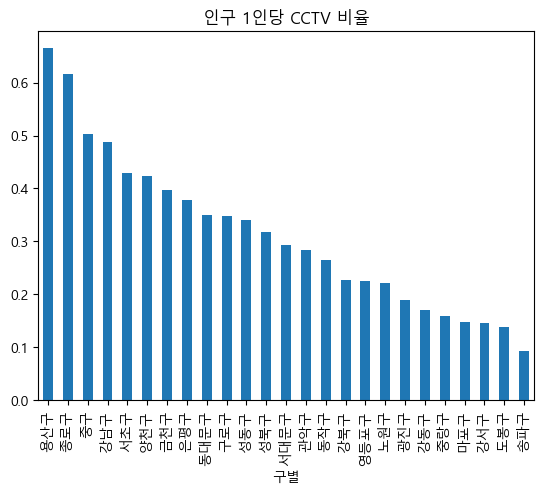

In [62]:
data_result['인구1인당CCTV비율'].sort_values(ascending=False).plot(kind='bar')
plt.title('인구 1인당 CCTV 비율')
plt.show()

## 실습 23. 인구수와 CCTV갯수가 어떤 분포인지, scatter로 나타내기

<Axes: xlabel='인구수', ylabel='CCTV갯수'>

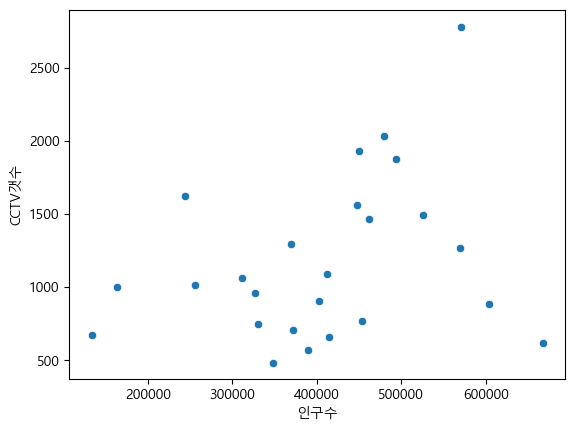

In [61]:
# 인구수와 CCTV갯수가 어떤 분포인지, scatter로 나타내기
sb.scatterplot(data=data_result, x='인구수', y='CCTV갯수')